In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'./first_project.csv')

# 1. Booking Status Distribution
This gives us a quick overview of the percentage of cancellations versus successful bookings, helping to analyze customer behavior.

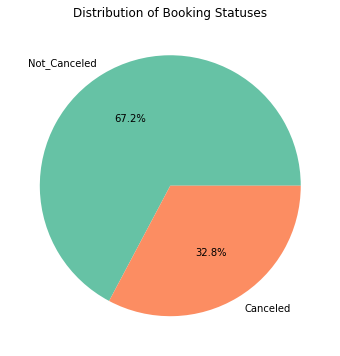

In [3]:
status_counts = df['booking status'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('Set2').colors)
plt.title('Distribution of Booking Statuses')
plt.show()